In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
wine_df = pd.read_csv('winequality-red.csv')


In [70]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [71]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [72]:
#the quality of 3 to 8 
#if 3 4 5 low quality 
#if 6 7 8 high quality
def quality_label(q):
    if q <=5:
        return 'low'
    else:
        return 'high'

In [73]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [74]:
print(wine_df["quality"].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


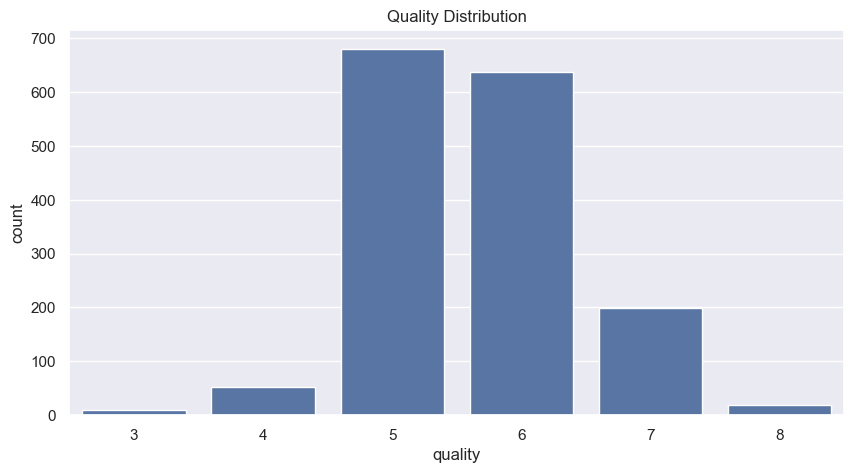

In [75]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='quality',data=wine_df)
plt.title('Quality Distribution')   
plt.show()

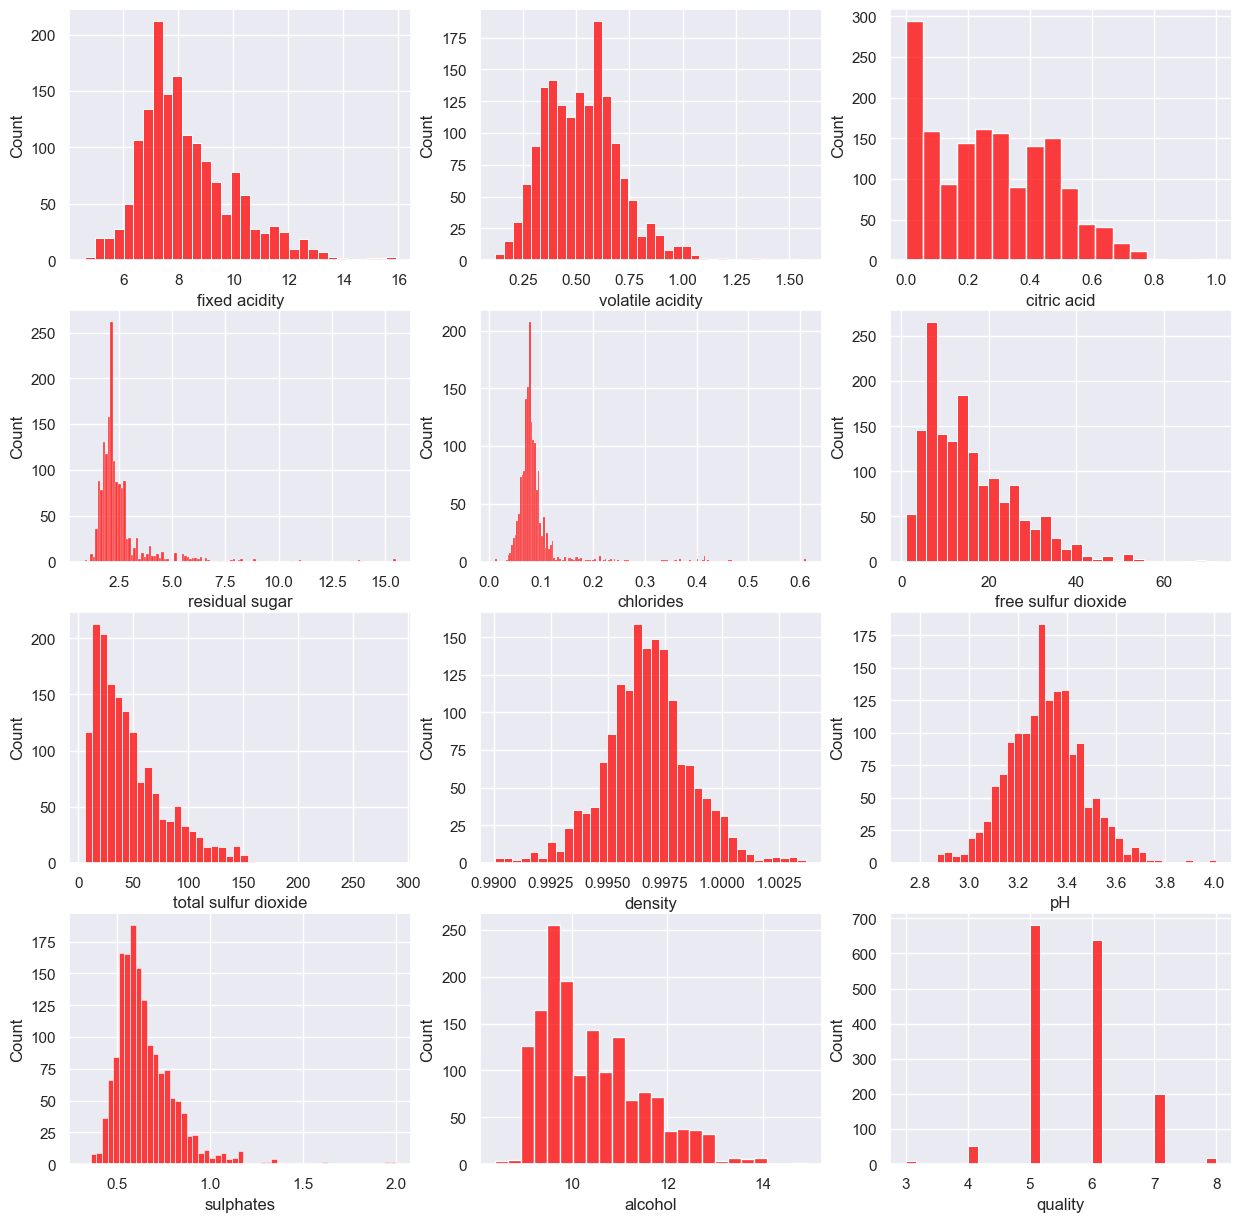

In [76]:
#visualization of the distributiion of all feature
sns.set(style="darkgrid")
color = sns.color_palette("pastel")
fig , ax1 = plt.subplots(4,3, figsize=(15,15))
k= 0
coloumns = list(wine_df.columns)
for i in range (4):
    for j in range (3):
        if k < len(coloumns):
            sns.histplot(wine_df[coloumns[k]], ax=ax1[i][j] ,color = "red")
            k += 1
plt.show()

In [77]:
def log_transform(column):
    return np.log1p(column[0])
wine_df['residual sugar'] = wine_df[['residual sugar']].apply(log_transform, axis=1)
wine_df['chlorides'] = wine_df[['chlorides']].apply(log_transform, axis=1)
wine_df['free sulfur dioxide'] = wine_df[['free sulfur dioxide']].apply(log_transform, axis=1)
wine_df['total sulfur dioxide'] = wine_df[['total sulfur dioxide']].apply(log_transform, axis=1)
wine_df['sulphates'] = wine_df[['sulphates']].apply(log_transform, axis=1)

C:\Users\nangi\AppData\Local\Temp\ipykernel_4092\2063218334.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(column[0])
C:\Users\nangi\AppData\Local\Temp\ipykernel_4092\2063218334.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(column[0])
C:\Users\nangi\AppData\Local\Temp\ipykernel_4092\2063218334.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(column[0])
C:\Users\nangi\AppD

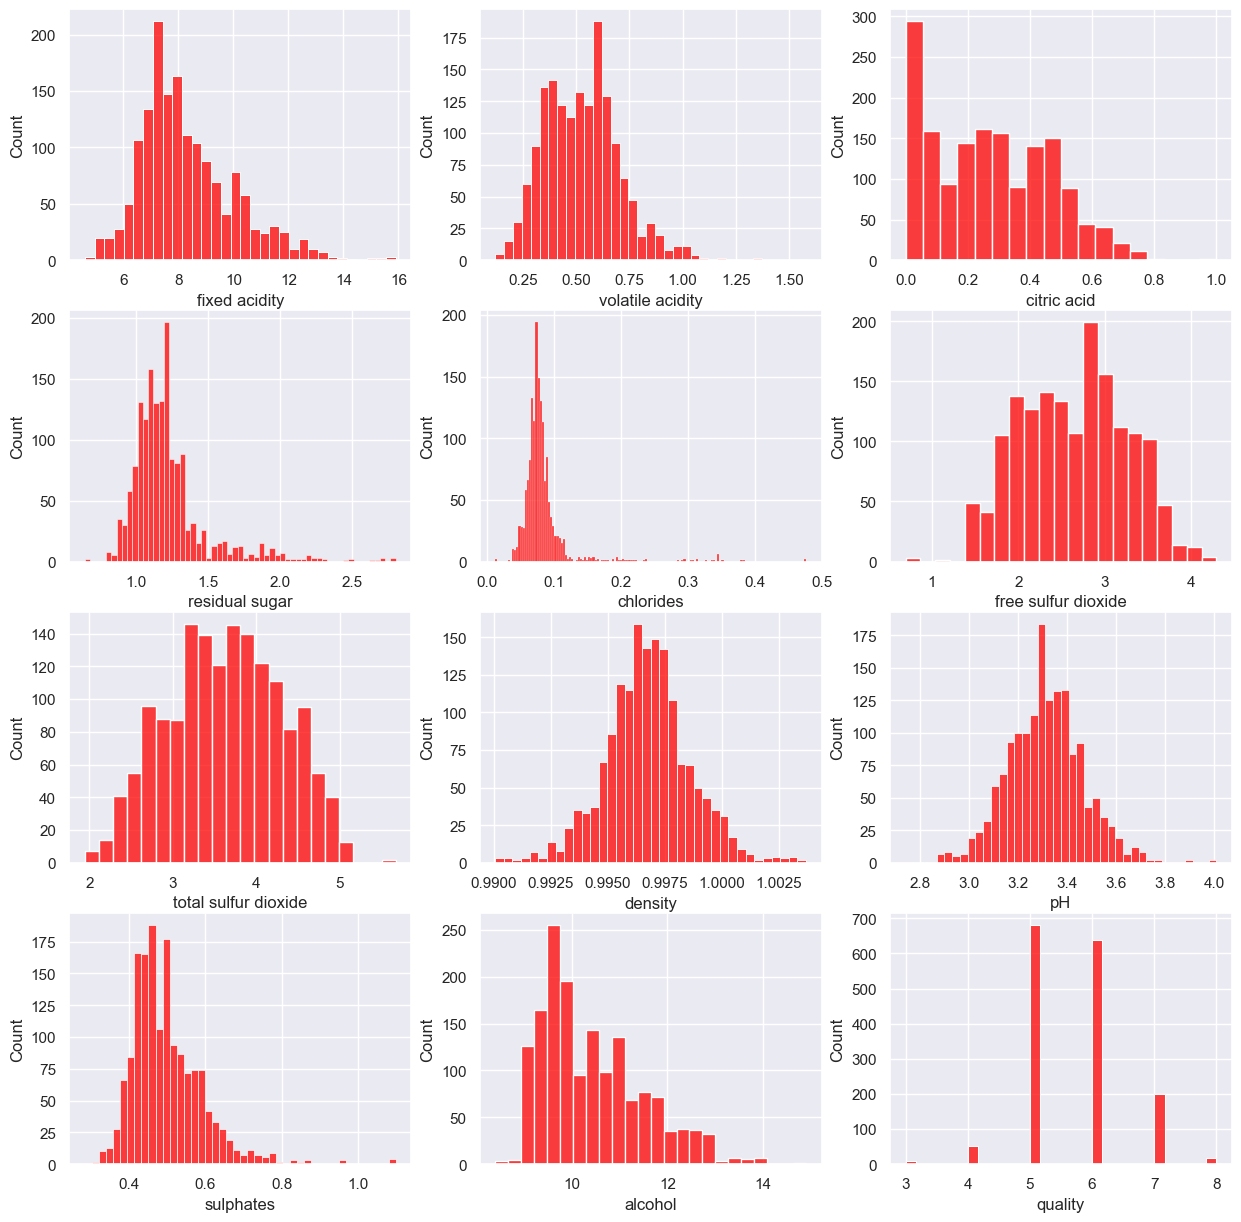

In [78]:
#after log transformation visualization
sns.set(style="darkgrid")
color = sns.color_palette("pastel")
fig , ax1 = plt.subplots(4,3, figsize=(15,15))
k= 0
coloumns = list(wine_df.columns)
for i in range (4):
    for j in range (3):
        if k < len(coloumns):
            sns.histplot(wine_df[coloumns[k]], ax=ax1[i][j] ,color = "red")
            k += 1
plt.show()

In [79]:
wine_df.corr().sort_values(by='quality', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.124052,-0.390558,0.226373,0.021687,-0.134818,-0.050344,-0.171419,-0.174919,-0.057731,0.280984,0.476166,1.000000
alcohol,-0.061668,-0.202288,0.109903,0.076381,-0.231967,-0.081808,-0.230553,-0.496180,0.205633,0.114782,1.000000,0.476166
sulphates,0.195163,-0.282193,0.324348,0.015572,0.338225,0.055347,0.059263,0.157096,-0.177952,1.000000,0.114782,0.280984
citric acid,0.671703,-0.552496,1.000000,0.168038,0.201936,-0.087838,-0.002553,0.364947,-0.541904,0.324348,0.109903,0.226373
fixed acidity,1.000000,-0.256131,0.671703,0.163362,0.104151,-0.179551,-0.118225,0.668047,-0.682978,0.195163,-0.061668,0.124052
residual sugar,0.163362,0.020523,0.168038,1.000000,0.055852,0.100081,0.153561,0.405800,-0.091654,0.015572,0.076381,0.021687
free sulfur dioxide,-0.179551,0.013142,-0.087838,0.100081,-0.005570,1.000000,0.784256,-0.039532,0.095520,0.055347,-0.081808,-0.050344
pH,-0.682978,0.234937,-0.541904,-0.091654,-0.269238,0.095520,-0.016021,-0.341699,1.000000,-0.177952,0.205633,-0.057731
chlorides,0.104151,0.068315,0.201936,0.055852,1.000000,-0.005570,0.062192,0.219430,-0.269238,0.338225,-0.231967,-0.134818
total sulfur dioxide,-0.118225,0.073671,-0.002553,0.153561,0.062192,0.784256,1.000000,0.104534,-0.016021,0.059263,-0.230553,-0.171419


In [80]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [81]:
x = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [82]:
#data balacing using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
x,y = oversample.fit_resample(x.fillna(0), y)


In [83]:
y.value_counts()

quality
5    681
6    681
7    681
4    681
8    681
3    681
Name: count, dtype: int64

In [87]:
#classify function

from sklearn.model_selection import train_test_split , cross_val_score

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)

    return model.score(x_test, y_test) * 100

In [88]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
accuracy_lr= classify(model, x, y)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr))


Logistic Regression Accuracy: 52.20%


C:\Users\nangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
accuracy = classify(model, x, y)
print("Decision Tree Classifier accuracy:{:.2f}%".format, accuracy)

<built-in method format of str object at 0x000001EDE98681B0> 77.81402936378467


In [90]:
#logistic regrression
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
accuracy_rf= classify(model, x, y)
print("Random Forest Classifier Accuracy: {:.2f}%".format(accuracy_rf))



Random Forest Classifier Accuracy: 85.24%


C:\Users\nangi\AppData\Local\Temp\ipykernel_4092\3686263912.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='pastel')


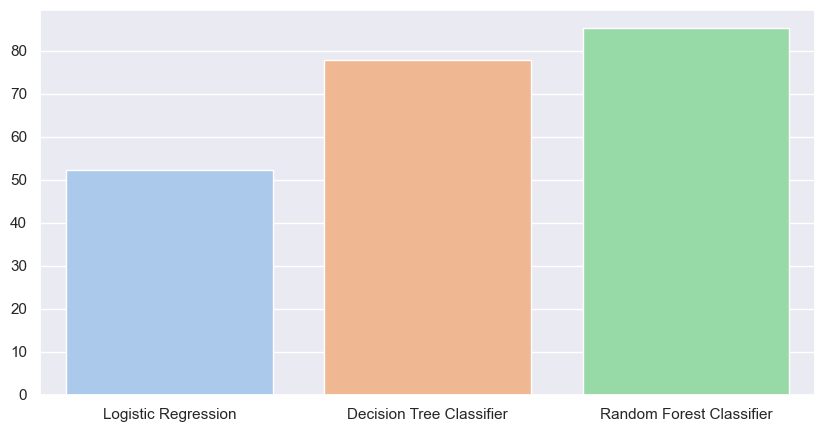

In [92]:
#plotting the accuracy of all models

models  = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracy = [accuracy_lr, accuracy, accuracy_rf]
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=accuracy, palette='pastel')
plt.show()

In [93]:
#predict the quality of wine
#inserting new data

model = RandomForestClassifier()
model.fit(x, y)

sample_data = (7.9,
               0.35,
               0.46,
               1.9,
               0.078,
               15,
               37,
               0.9973,
               3.35,
               0.86,
               12.8)
sample_data = np.array(sample_data).reshape(1,-1)
prediction = model.predict(sample_data)
print("Predicted Quality of Wine:", prediction[0])

Predicted Quality of Wine: 7


C:\Users\nangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [94]:
#create a pickle file   
import pickle
with open('wine_quality_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("Model saved to wine_quality_model.pkl")

Model saved to wine_quality_model.pkl
